# Nội dung thực hành  

(1) Download dữ liệu IRIS:

https://www.kaggle.com/datasets/arshid/iris-flower-dataset&ved=2ahUKEwjCoN_LhL-FAxW4klYBHScfC4wQFnoECCUQAQ&usg=AOvVaw3VCKwj5QJnyhI-Tbrjr99e - link hỏng  

https://www.kaggle.com/datasets/uciml/iris

**Chạy các thuật toán phân cụm cứng**  
(2) Chạy thuật toán phân cụm phân hoạch K-Means cho dữ liệu IRIS:

https://colab.research.google.com/github/SANTOSHMAHER/Machine-Learning-Algorithams/blob/master/K_Means_algorithm_using_Python_from_scratch_.ipynb

(3) Chạy thuật toán phân cụm theo mật độ DBSCAN, DBSCAN2 cho dữ liệu IRIS:

https://m.youtube.com/watch%3Fv%3DNIohpE1COhw&ved=2ahUKEwjI7v3ngr-FAxUdsFYBHaEPDwkQjjh6BAgoEAE&usg=AOvVaw2PHdSNo_PLaRcEtDM5bunj

(4) Chạy thuật toán phân cụm phân cấp cho dữ liệu IRIS:

https://www.linkedin.com/pulse/hierarchical-clustering-customers-segmentation-healthcare-samy

(5) Tính toán độ đo chất lượng cụm cho cả 3 ví dụ trên:

https://www.datanovia.com/en/lessons/cluster-validation-statistics-must-know-methods/#:~:text=Internal%20validation%20measures%20reflect%20often,i.e.%2C%20a%20good%20clustering).

(6) Gửi code với tên file Clustering_Họ tên SV.zip sau thực hành.

# Import, phân chia data và trực quan hóa bộ dữ liệu hoa Iris  

Về bộ dữ liệu:  

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [2]:
from sklearn.datasets import load_iris

# Load bộ dữ liệu hoa Iris
iris = load_iris()

# Hiển thị thông tin về bộ dữ liệu
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Number of samples:", len(iris.data))
print("Data shape:", iris.data.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Data shape: (150, 4)


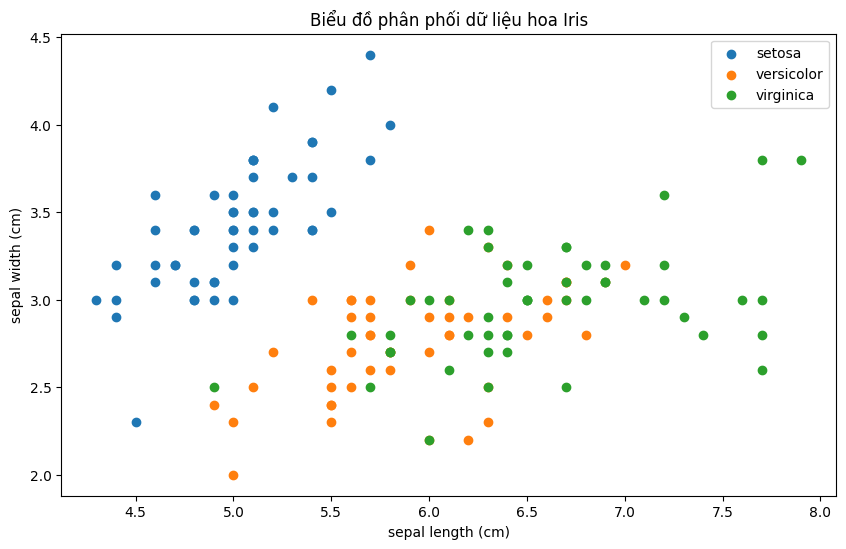

In [3]:
import matplotlib.pyplot as plt

X = iris.data  # các đặc trưng của mẫu
y = iris.target  # nhãn thực của mẫu

# Tạo một scatter plot
plt.figure(figsize=(10, 6))

# Vẽ mỗi lớp mẫu dữ liệu
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=iris.target_names[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Biểu đồ phân phối dữ liệu hoa Iris")
plt.legend()
plt.show()

# Chạy phân cụm Kmeans

## Thuật toán lý thuyết

### Thuật toán  
Thuật toán K-means là một phương pháp phân cụm dữ liệu phổ biến trong học không giám sát. Dưới đây là tóm tắt về giải thuật K-means:

1. **Khởi tạo trung tâm cụm**: Chọn ngẫu nhiên k điểm dữ liệu từ tập dữ liệu làm trung tâm ban đầu của các cụm.

2. **Phân loại dữ liệu**: Gán từng điểm dữ liệu vào cụm gần nhất dựa trên khoảng cách Euclidean giữa điểm dữ liệu và các trung tâm cụm. (Với mỗi điểm thực hiện tính khoảng cách tới k tâm cụm và gán nó thuộc về cụm mà khoảng cách là MIN)

3. **Cập nhật trung tâm cụm**: Tính toán trung tâm mới cho mỗi cụm bằng cách lấy trung bình của tất cả các điểm dữ liệu thuộc cụm đó.

4. **Lặp lại quá trình**: Lặp lại bước 2 và bước 3 cho đến khi không có sự thay đổi đáng kể trong vị trí của các trung tâm cụm hoặc số lần lặp đã đạt đến giới hạn đã định trước.

5. **Kết thúc**: Kết thúc khi hội tụ và không có sự thay đổi đáng kể trong vị trí của các trung tâm cụm.

6. **Đánh giá kết quả**: Sau khi hoàn thành, mỗi điểm dữ liệu được gán vào cụm mà nó gần nhất với trung tâm của cụm đó.

Thuật toán K-means cố gắng tối ưu hóa hàm mục tiêu, tức là tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến trung tâm của cụm mà nó thuộc về.

### Kỹ thuật encode data để dùng cho thuật toán  
Không phải mọi dữ liệu đã có đều đã được encode về dạng số nên để dùng Kmeans cần encode trước.  
Eg: với các nhãn dạng Text $\rightarrow$ sang Số

### Kỹ thuật Elbow để lựa chọn số cụm hợp lý  
Cho 1 vòng lặp số lượng cụm k qua 1 khoảng $\rightarrow$ vẽ được đồ thị về tổng bình phương khoảng cách các điểm 1 cụm đến tâm cụm.  
Đồ thị thu được nếu có hình chữ L (tức đến 1 giá trị k nhất định sẽ là đủ tốt và không nhất thiết lựa chọn số cụm lớn hơn)

## sklearn.cluster.KMeans Document

**Hàm khởi tạo**  
  
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')  
- init{'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'
    - 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is 
    "greedy k-means++". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.
    - 'random': choose n_clusters observations (rows) at random from data for the initial centroids.
    - If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
    - If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.
- n_init 'auto' or int, default= 'auto'
    - Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems (see Clustering sparse data with k-means).
    - When n_init='auto', the number of runs depends on the value of init: 10 if using init='random' or init is a callable; 1 if using init='k-means++' or init is an array-like.
- algorithm{"lloyd", "elkan"}, default="lloyd"
    - K-means algorithm to use. The classical EM-style algorithm is "lloyd". The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it's more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

**Thuộc tính**  
  
- cluster_centers_: ndarray of shape (n_clusters, n_features)
    Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.
- labels_: ndarray of shape (n_samples,)
    Labels of each point
- inertia_float:
    Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
- n_iter_int:
    Number of iterations run.
- n_features_in_int:
    Number of features seen during fit.

- feature_names_in_: ndarray of shape (n_features_in_,)
    Names of features seen during fit. Defined only when X has feature names that are all strings.

**Phương thức**
- fit(X[, y, sample_weight]): Compute k-means clustering.
- fit_predict(X[, y, sample_weight]): Compute cluster centers and predict cluster index for each sample.
- fit_transform(X[, y, sample_weight]): Compute clustering and transform X to cluster-distance space.
- get_feature_names_out([input_features]): Get output feature names for transformation.
- get_metadata_routing(): Get metadata routing of this object.
- get_params([deep]): Get parameters for this estimator.
- predict(X[, sample_weight]): Predict the closest cluster each sample in X belongs to.
- score(X[, y, sample_weight]): Opposite of the value of X on the K-means objective.
- set_fit_request(*[, sample_weight]): Request metadata passed to the fit method.
- set_output(*[, transform]): Set output container.
- set_params(**params): Set the parameters of this estimator.
- set_predict_request(*[, sample_weight]): Request metadata passed to the predict method.
- set_score_request(*[, sample_weight]): Request metadata passed to the score method.
- transform(X): Transform X to a cluster-distance space.

## Code triển khai ví dụ

Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


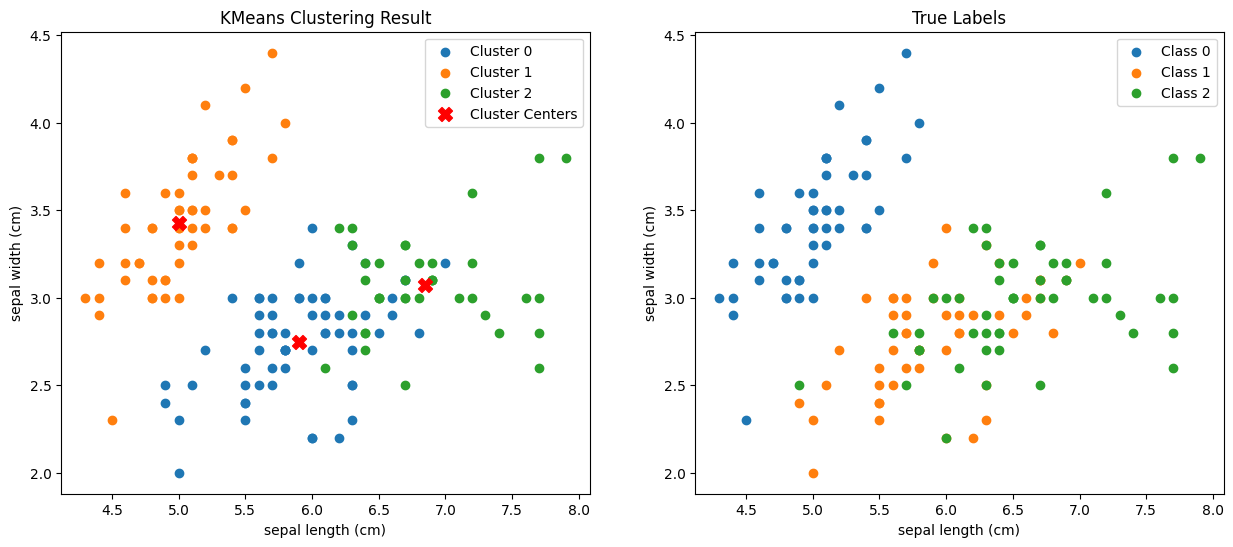

In [6]:
from sklearn.cluster import KMeans
import numpy as np 

# Tạo mô hình K-means với số cụm là 3 (do Iris có 3 loài hoa)
kmeans = KMeans(n_clusters=3, random_state=42)

# Huấn luyện mô hình trên dữ liệu
kmeans.fit(X)

# Lấy ra các trung tâm của các cụm
centroids = kmeans.cluster_centers_

# Hiển thị các trung tâm của các cụm
print("Centroids:")
print(centroids)

# Dự đoán nhãn cụm cho từng mẫu
labels_kmeans = kmeans.predict(X)

# # Vẽ biểu đồ phân cụm
# plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
# plt.xlabel(iris.feature_names[0])
# plt.ylabel(iris.feature_names[1])
# plt.title('Phân cụm hoa Iris bằng K-means')
# plt.legend()
# plt.show()

# Tìm tâm của các cụm
unique_labels = np.unique(labels_kmeans)
cluster_centers = []
for label in unique_labels:
    cluster_centers.append(np.mean(X[labels_kmeans == label], axis=0))

# Tạo một figure với hai subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Vẽ biểu đồ cho kết quả của DBSCAN
for label in unique_labels:
    axs[0].scatter(X[labels_kmeans == label, 0], X[labels_kmeans == label, 1], label=f'Cluster {label}')
axs[0].scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], marker='X', c='red', s=100, label='Cluster Centers')
axs[0].set_title('KMeans Clustering Result')
axs[0].set_xlabel(iris.feature_names[0])
axs[0].set_ylabel(iris.feature_names[1])
axs[0].legend()

# Vẽ biểu đồ cho nhãn thực sự
for label in np.unique(y):
    axs[1].scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}')
axs[1].set_title('True Labels')
axs[1].set_xlabel(iris.feature_names[0])
axs[1].set_ylabel(iris.feature_names[1])
axs[1].legend()

# Hiển thị biểu đồ
plt.show()


### Dùng kỹ thuật Elbow

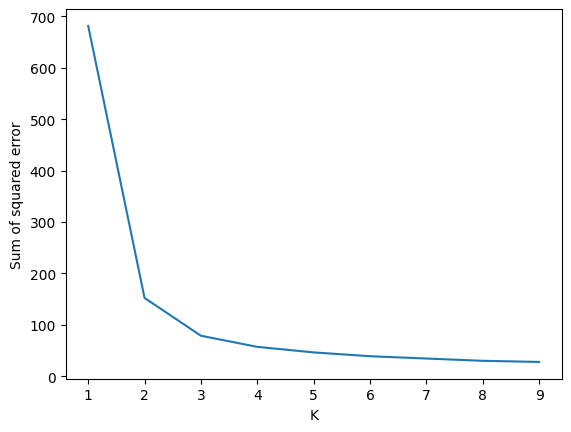

In [5]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)

Như vậy số cụm từ 3 đến 4 là hợp lý  

# Chạy thuật toán phân cụm theo mật độ DBSCAN, DBSCAN2

## Thuật toán lý thuyết 

### Tóm tắt cơ bản

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) là một thuật toán phân cụm dữ liệu dựa trên mật độ, được đề xuất bởi Martin Ester, Hans-Peter Kriegel, Jorg Sander và Xu Xu trong năm 1996. Thuật toán này có khả năng phát hiện các cụm có hình dạng và kích thước không đều, và cũng có khả năng xác định và loại bỏ các nhiễu (điểm dữ liệu không thuộc vào bất kỳ cụm nào).

Dưới đây là lý thuyết cơ bản của thuật toán DBSCAN:

1. **Đặc điểm chính**: DBSCAN **phân cụm dựa trên mật độ** của các điểm dữ liệu. Nó xem xét mật độ của các điểm trong không gian dữ liệu và phát hiện các cụm dựa trên mật độ cao và sự phân tán của các điểm.

2. **Tham số**: Thuật toán DBSCAN có hai tham số chính:
   - **Epsilon (eps)**: Đây là một **bán kính xác định khoảng cách mà một điểm được coi là lân cận của một điểm khác**.
   - **MinPts**: Số **lượng điểm tối thiểu** cần thiết để **một cụm được coi là có mật độ cao**.

3. **Cách hoạt động**:
   - Bắt đầu với một điểm dữ liệu bất kỳ và xác định tất cả các điểm lân cận của nó bên trong bán kính epsilon.
   - Nếu số lượng điểm trong lân cận của điểm đó vượt quá MinPts, điểm đó được coi là một điểm trung tâm của một cụm.
   - Tiếp tục mở rộng cụm bằng cách tìm kiếm các điểm lân cận của các điểm lân cận đã xác định, và nhóm chúng vào cùng một cụm.
   - Nếu một điểm không phải là trung tâm của bất kỳ cụm nào, nhưng vẫn nằm trong lân cận của một cụm, điểm đó được coi là một điểm biên của cụm.
   - Nếu một điểm không nằm trong lân cận của bất kỳ cụm nào, nó được coi là một điểm nhiễu (noise point).

4. **Ưu điểm**:
   - Có khả năng phát hiện và phân cụm các cụm có hình dạng và kích thước không đều.
   - Có khả năng xử lý dữ liệu có nhiễu và dữ liệu dạng mật độ không đồng đều.

5. **Nhược điểm**:
   - Cần phải xác định hai tham số: epsilon và MinPts.
   - Hiệu suất của thuật toán có thể bị ảnh hưởng bởi các giá trị của các tham số.  
  
**Tổng kết**:
DBSCAN là một thuật toán đơn giản và hiệu quả. Nó hoạt động dựa trên cách tiếp cận mật độ phân phối của dữ liệu. Ưu điểm của thuật toán đó là có thể tự động loại bỏ được các điểm dữ liệu nhiễu, hoạt động tốt đối với những dữ liệu có hình dạng phân phối đặc thù và có tốc độ tính toán nhanh. Tuy nhiên DBSCAN thường không hiệu quả đối với những dữ liệu có phân phối đều khắp nơi. Khi huấn luyện DBSCAN thì các tham số của mô hình như khoảng cách `epsilon`, số lượng điểm lân cận tối thiểu `minPts` và hàm khoảng cách là những tham số có ảnh hưởng rất lớn đối với kết quả phân cụm. Thực tế cho thấy thuật toán khá nhạy với tham số `epsilon` và `minPts` nên chúng ta cần phải lựa chọn tham số cho mô hình trước khi tiến hành xây dựng mô hình. 

Hình dưới đây mô phỏng cách thuật toán hoạt động 

<!-- ![](https://imgur.com/9D6aAF2.gif) -->

### Ý tưởng chung

Khi biểu diễn các điểm dữ liệu trong không gian chúng ta sẽ thấy rằng thông thường các vùng không gian có mật độ cao sẽ xen kẽ bởi các vùng không gian có mật độ thấp. Nếu như phải dựa vào mật độ để phân chia thì khả năng rất cao những tâm cụm sẽ tập trung vào những vùng không gian có mật độ cao trong khi biên sẽ rơi vào những vùng không gian có mật độ thấp. Trong lớp các mô hình phân cụm của học không giám sát tồn tại một kĩ thuật _phân cụm dựa trên mật độ_ (_Density-Based Clustering_), kĩ thuật này này đề cập đến các phương pháp _học không giám sát_ nhằm xác định các cụm phân biệt trong phân phối của dữ liệu, dựa trên ý tưởng rằng một cụm trong không gian dữ liệu là một vùng có mật độ điểm cao được ngăn cách với các cụm khác bằng các vùng liền kề có mật độ điểm thấp .

_DBSCAN_ là một thuật toán cơ sở để phân nhóm dựa trên mật độ. Nó có thể phát hiện ra các cụm có hình dạng và kích thước khác nhau từ một lượng lớn dữ liệu chứa _nhiễu_.

### Các khái niệm cơ bản

**Định nghĩa 1:** Vùng lân cận epsilon (_Eps-neighborhood_) của một điểm dữ liệu $P$ được định nghĩa là tợp hợp tất cả các điểm dữ liệu nằm trong phạm vi bán kính _epsilon_ (kí hiệu $\epsilon$) xung quanh điểm $P$. Kí hiệu tập hợp những điểm này là:

$$N_{eps}(P) = \{Q \in \mathcal{D}: d(P, Q) \leq \epsilon\}$$

Trong đó $\mathcal{D}$ là tập hợp tất cả các điểm dữ liệu của tập huấn luyện.

**Định nghĩa 2:** Khả năng tiếp cận trực tiếp mật độ (_directly density-reachable_) đề cập tới việc một điểm có thể tiếp cận trực tiếp tới một điểm dữ liệu khác. Cụ thể là một điểm $Q$ được coi là có thể tiếp cận trực tiếp bởi điểm $P$ tương ứng với tham số `epsilon` và `minPts` nếu như nó thoả mãn hai điều kiện:

1. $Q$ nằm trong _vùng lân cận epsilon_ của $P$: $Q \in N_{eps}(P)$
2. Số lượng các điểm dữ liệu nằm trong _vùng lân cận epsilon_ tối thiểu là `minPts`: $|N_{eps}(Q)| \geq \text{minPts} $

Như vậy một điểm dữ liệu có thể tiếp cận được trực tiếp tới một điểm khác không chỉ dựa vào khoảng cách giữa chúng mà còn phụ thuộc vào mật độ các điểm dữ liệu trong _vùng lân cận epsilon_ phải tối thiểu bằng `minPts`. Khi đó _vùng lân cận_ được coi là có mật độ cao và sẽ được phân vào các cụm. Trái lại thì _vùng lân cận_ sẽ có mật độ thấp. Trong trường hợp mật độ thấp thì điểm dữ liệu ở trung tâm được coi là không kết nối trực tiếp tới những điểm khác trong _vùng lân cận_ và những điểm này có thể rơi vào biên của cụm hoặc là một điểm dữ liệu _nhiễu_ không thuộc về cụm nào.

**Định nghĩa 3:** Khả năng tiếp cận mật độ (_density-reachable_) liên quan đến cách hình thành một chuỗi liên kết điểm trong cụm. Cụ thể là trong một tập hợp chuỗi điểm $\{ P_i \}_{i=1}^{n} \subset \mathcal{D}$ mà nếu như bất kì một điểm $P_{i}$ nào cũng đều có thể _tiếp cận trực tiếp mật độ_ (định nghĩa 2) bởi $P_{i-1}$ theo tham số `epsilon` và `minPts` thì khi đó ta nói điểm $P = P_n$ có khả năng _kết nối mật độ_ tới điểm $Q = P_1$.

Từ định nghĩa 3 ta suy ra hai điểm $P_i$ và $P_j$ bất kì thuộc chuỗi $\{P_i\}_{i=1}^{n}$ thoả mãn $i < j$ thì $P_j$ đều có khả năng _kết nối mật độ_ tới $P_i$. Hai điểm bất kì có khả năng _kết nối mật độ_ với nhau thì sẽ thuộc cùng một cụm. Từ đó suy ra các điểm trong chuỗi $\{P_i\}_{i=1}^{n}$ đều được phân vềcùng cụm. Khả năng tiếp cận mật độ thể hiện sự mở rộng phạm vi của một cụm dữ liệu dựa trên liên kết theo chuỗi. Xuất phát từ một điểm dữ liệu ta có thể tìm được các điểm có khả năng _kết nối mật độ_ tới nó theo lan truyền chuỗi để xác định cụm.

### Phân loại dạng điểm trong DBSCAN

Căn cứ vào vị trí của các điểm dữ liệu so với cụm chúng ta có thể chia chúng thành ba loại: Đối với các điểm nằm sâu bên trong cụm chúng ta xem chúng là _điễm lõi_. Các _điểm biên_ nằm ở phần ngoài cùng của cụm và _điểm nhiễu_ không thuộc bất kì một cụm nào. Bên dưới là hình vẽ mô phỏng thể hiện ba loại điểm tương ứng nêu trên.

Trong thuật toán _DBSCAN_ sử dụng hai tham số chính đó là:

* `minPts`: Là một ngưỡng số điểm dữ liệu tối thiểu được nhóm lại với nhau nhằm xác định một _vùng lân cận epsilon_ có mật độ cao. Số lượng `minPts` không bao gồm điểm ở tâm.

* `epsilon` ( kí hiệu $\epsilon$ ): Một giá trị khoảng cách được sử dụng để xác định _vùng lân cận epsilon_ của bất kỳ điểm dữ liệu nào.

Hai tham số trên sẽ được sử dụng để xác định _vùng lân cận epsilon_ và khả năng tiếp cận giữa các điểm dữ liệu lẫn nhau. Từ đó giúp kết nối chuỗi dữ liệu vào chung một cụm.

Hai tham số trên giúp xác định ba loại điểm:

* _điểm lõi_ (_core_): Đây là một điểm có ít nhất `minPts` điểm trong _vùng lân cận epsilon_ của chính nó.
* _điểm biên_ (_border_): Đây là một điểm có ít nhất một _điểm lõi_ nằm ở _vùng lân cận epsilon_ nhưng mật độ không đủ `minPts` điểm.
* _điểm nhiễu_ (_noise_): Đây là điểm không phải là _điểm lõi_ hay _điểm biên_.

Đối với một cặp điểm $(P, Q)$ bất kì sẽ có ba khả năng:

* Cả $P$ và $Q$ đều có khả năng _kết nối mật độ_ được với nhau. Khi đó $P$, $Q$ đều thuộc về chung một cụm.

* $P$ có khả năng _kết nối mật độ_ được với $Q$ nhưng $Q$ không _kết nối mật độ_ được với $P$. Khi đó $P$ sẽ là _điểm lõi_ của cụm còn $Q$ là một _điểm biên_.

* $P$ và $Q$ đều không _kết nối mật độ_ được với nhau. Trường hợp này $P$ và $Q$ sẽ rơi vào những cụm khác nhau hoặc một trong hai điểm là _điểm nhiễu_.

### Thuật toán và xác định tham số  
  
**Các bước trong thuật toán DBSCAN**

* **Bước 1:** Thuật toán lựa chọn một điểm dữ liệu bất kì. Sau đó tiến hành xác định các _điểm lõi_ và _điểm biên_ thông qua _vùng lân cận epsilon_ bằng cách lan truyền theo liên kết chuỗi các điểm thuộc cùng một cụm. 

* **Bước 2:** Cụm hoàn toàn được xác định khi không thể mở rộng được thêm. Khi đó lặp lại đệ qui toàn bộ quá trình với điểm khởi tạo trong số các điểm dữ liệu còn lại để xác định một cụm mới.



**Xác định tham số**  

Xác định tham số là một bước quan trọng và ảnh hưởng trực tiếp tới kết quả của các thuật toán. Đối với thuật _DBSCAN_ cũng không ngoại lệ. Chúng ta cần phải xác định chính xác tham số cho thuật toán _DBSCAN_ một cách phù hợp với từng bộ dữ liệu cụ thể, tuỳ theo đặc điểm và tính chất của phân phối của bộ dữ liệu. Hai tham số cần lựa chọn trong _DBSCAN_ đó chính là `minPts` và `epsilon`:

* `minPts`: Theo quy tắc chung, $\text{minPts}$ tối thiểu có thể được tính theo số chiều $D$ trong tập dữ liệu đó là $\text{minPts} \geq D + 1$. Một giá trị $\text{minPts} = 1$ không có ý nghĩa, vì khi đó mọi điểm bản thân nó đều là một cụm. Với $\text{minPts} \leq 2$, kết quả sẽ giống như _phân cụm phân cấp_ (_hierarchical clustering_) với _single linkage_ với biểu đồ _dendrogram_ được cắt ở độ cao $y=$ `epsilon`. Do đó, $\text{minPts}$ phải được chọn ít nhất là $3$. Tuy nhiên, các giá trị lớn hơn thường tốt hơn cho các tập dữ liệu có nhiễu và kết quả phân cụm thường hợp lý hơn. Theo quy tắc chung thì thường chọn $\text{minPts} = 2 \times \text{dim}$. Trong trường hợp dữ liệu có nhiễu hoặc có nhiều quan sát lặp lại thì cần lựa chọn giá trị $\text{minPts}$ lớn hơn nữa tương ứng với những bộ dữ liệu lớn.

* `epsilon`: Giá trị $\epsilon$ có thể được chọn bằng cách vẽ một biểu đồ `k-distance`. Đây là biểu đồ thể hiện giá trị khoảng cách trong thuật toán k-Means clustering đến $k = \text{minPts}-1$ điểm láng giềng gần nhất. Ứng với mỗi điểm chúng ta chỉ lựa chọn ra khoảng cách lớn nhất trong $k$ khoảng cách. Những khoảng cách này trên đồ thị được sắp xếp theo thứ tự giảm dần. Các giá trị tốt của $\epsilon$ là vị trí mà biểu đồ này cho thấy xuất hiện một điểm _khuỷ tay_ (_elbow point_): Nếu $\epsilon$ được chọn quá nhỏ, một phần lớn dữ liệu sẽ không được phân cụm và được xem là _nhiễu_; trong khi đối với giá trị $\epsilon$ quá cao, các cụm sẽ hợp nhất và phần lớn các điểm sẽ nằm trong cùng một cụm. Nói chung, các giá trị nhỏ của $\epsilon$ được ưu tiên hơn và theo quy tắc chung, chỉ một phần nhỏ các điểm nên nằm trong vùng lân cận epsilon.

* Hàm khoảng cách: Việc lựa chọn hàm khoảng cách có mối liên hệ chặt chẽ với lựa chọn $\epsilon$ và tạo ra ảnh hưởng lớn tới kết quả. Điểm quan trọng trước tiên đó là chúng ta cần xác định một thước đo hợp lý về _độ khác biệt_ (_disimilarity_) cho tập dữ liệu trước khi có thể chọn tham số $\epsilon$. Khoảng cách được sử dụng phổ biến nhất là `euclidean distance`.

## sklearn.cluster.DBSCAN Document

**Hàm khởi tạo**
class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)  

- epsfloat, default=0.5
    The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- min_samplesint, default=5
    The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
- metricstr, or callable, default=’euclidean’
    The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors for DBSCAN.
    New in version 0.17: metric precomputed to accept precomputed sparse matrix.
- metric_paramsdict, default=None
    Additional keyword arguments for the metric function.
    New in version 0.19.
- algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.
- leaf_sizeint, default=30
    Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
- pfloat, default=None
    The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2 (equivalent to the Euclidean distance).
- n_jobsint, default=None
    The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

**Thuộc tính**  
core_sample_indices_ndarray of shape (n_core_samples,)

    Indices of core samples.
components_ndarray of shape (n_core_samples, n_features)

    Copy of each core sample found by training.
labels_ndarray of shape (n_samples)

    Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
n_features_in_int

    Number of features seen during fit.
feature_names_in_ndarray of shape (n_features_in_,)

    Names of features seen during fit. Defined only when X has feature names that are all strings.

**Phương thức**  
- fit(X[, y, sample_weight])
Perform DBSCAN clustering from features, or distance matrix.

- fit_predict(X[, y, sample_weight])
Compute clusters from a data or distance matrix and predict labels.

- get_metadata_routing()
Get metadata routing of this object.

- get_params([deep])
Get parameters for this estimator.

- set_fit_request(*[, sample_weight])
Request metadata passed to the fit method.

- set_params(**params)
Set the parameters of this estimator.

## Code triển khai ví dụ 

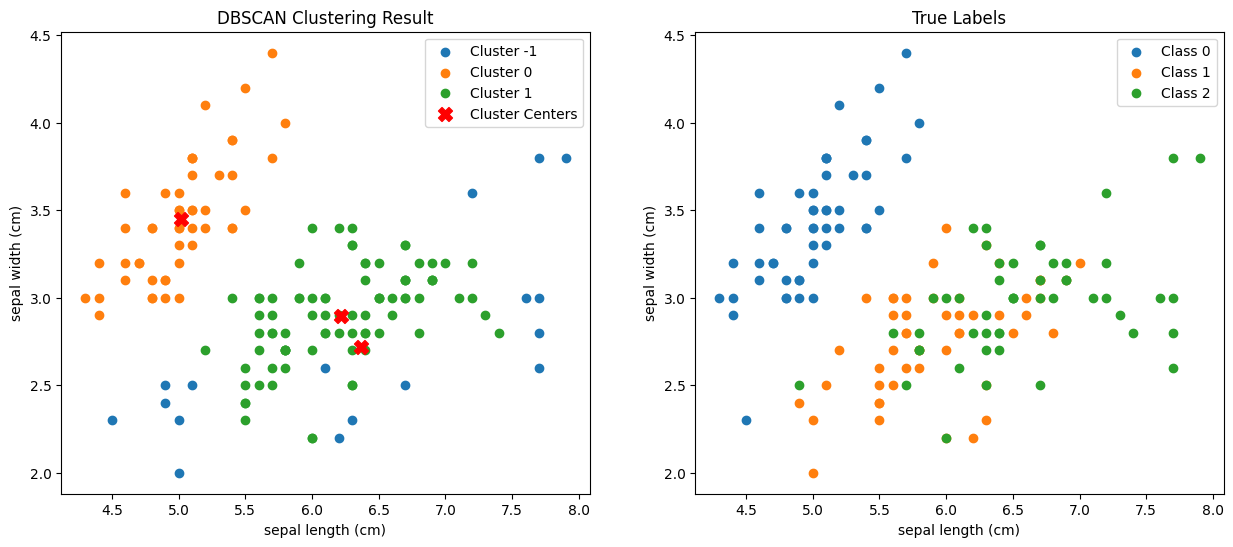

In [10]:
# Chạy thuật toán DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# # Tạo một figure với hai subplot
# fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# # Vẽ biểu đồ cho kết quả của DBSCAN
# axs[0].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
# axs[0].set_title('DBSCAN Clustering Result')
# axs[0].set_xlabel(iris.feature_names[0])
# axs[0].set_ylabel(iris.feature_names[1])

# # Vẽ biểu đồ cho nhãn thực sự
# axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
# axs[1].set_title('True Labels')
# axs[1].set_xlabel(iris.feature_names[0])
# axs[1].set_ylabel(iris.feature_names[1])

# # Hiển thị biểu đồ
# plt.show()

# Tìm tâm của các cụm
unique_labels = np.unique(labels_dbscan)
cluster_centers = []
for label in unique_labels:
    cluster_centers.append(np.mean(X[labels_dbscan == label], axis=0))

# Tạo một figure với hai subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Vẽ biểu đồ cho kết quả của DBSCAN
for label in unique_labels:
    axs[0].scatter(X[labels_dbscan == label, 0], X[labels_dbscan == label, 1], label=f'Cluster {label}')
axs[0].scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], marker='X', c='red', s=100, label='Cluster Centers')
axs[0].set_title('DBSCAN Clustering Result')
axs[0].set_xlabel(iris.feature_names[0])
axs[0].set_ylabel(iris.feature_names[1])
axs[0].legend()

# Vẽ biểu đồ cho nhãn thực sự
for label in np.unique(y):
    axs[1].scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}')
axs[1].set_title('True Labels')
axs[1].set_xlabel(iris.feature_names[0])
axs[1].set_ylabel(iris.feature_names[1])
axs[1].legend()

# Hiển thị biểu đồ
plt.show()

# Chạy thuật toán phân cụm phân cấp (Hierarchical Clustering)

## Thuật toán lý thuyết 

Thuật toán phân cụm K-means cho thấy cần phải cấu hình trước số lượng cụm cần phân chia. Ngược lại, phương pháp phân cụm phân cấp (Hierachical Clustering) không yêu cầu khai báo trước số lượng cụm. Thay vào đó, thuật toán chỉ yêu cầu xác định trước thước đo về sự khác biệt giữa các cụm (không giao nhau), dựa trên sự khác biệt từng cặp giữa các quan sát trong hai cụm. Theo phương pháp này, chúng tạo ra những biểu diễn phân cấp trong đó các cụm ở mỗi cấp của hệ thống phân cấp được tạo bằng cách hợp nhất các cụm ở cấp độ thấp hơn bên dưới. Ở cấp thấp nhất, mỗi cụm chứa một quan sát. Ở cấp cao nhất, chỉ có một cụm chứa tất cả dữ liệu. 

Thuật toán phân cụm phân cấp được xây dựng trên bộ dữ liệu có kích thước N thì sẽ trải qua tổng cộng N bước phân chia. Có hai chiến lược phân chia chính phụ thuộc vào chiều di chuyển trên biểu đồ dendrogram mà chúng ta sẽ tìm hiểu bên dưới:
- Chiến lược hợp nhất: Chiến lược này sẽ đi theo chiều bottum-up (từ dưới lên trên). Quá trình phân cụm bắt đầu ở dưới cùng tại các node lá (còn gọi là leaf node hoặc termial node). Ban dầu mỗi quan sát sẽ được xem là một cụm tách biệt được thể hiện bởi một node lá. Ở mỗi level chúng ta sẽ tìm cách hợp một cặp cụm thành một cụm duy nhất nhằm tạo ra một cụm mới ở level cao hơn tiếp theo. Cụm mới này tương ứng với các node quyết định (non-leaf node). Như vậy sau khi hợp cụm thì số lượng cụm ít hơn. Một cặp được chọn để hợp nhất sẽ là những cụm trung gian không giao nhau.

- Chiến lược phân chia: Chiến lược này sẽ thực hiện theo chiều top-down. Tức là phân chia bắt đầu từ node gốc của đồ thị. Node gốc bao gồm toàn bộ các quan sát, tại mỗi level chúng ta phân chia một cách đệ qui các cụm đang tồn tại tại level đó thành hai cụm mới. Phép phân chia được tiến hành sao cho tạo thành hai cụm mới mà sự tách biệt giữa chúng là lớn nhất. Sự tách biệt này sẽ được đo lường thông qua một thước đo khoảng cách mà ta sẽ tìm hiểu kĩ hơn bên dưới.

Như vậy đồ thị của chiến lược phân chia và chiến lược hợp nhất đều là cây nhị phân, chúng chỉ khác biệt về chiều thực hiện thuật toán. Node gốc của cây nhị phân sẽ bao gồm toàn bộ các quan sát và cây nhị phân bao gồm
node lá đại diện cho quan sát từ bộ dữ liệu. Mỗi một node quyết định bao gồm hai node con. Quá trình phân chia thì hai node con thể hiện kết quả được phân chia từ node cha và quá trình hợp nhất thì node cha là thể hiện kết quả sau khi gộp hai node con.

## sklearn.cluster.AgglomerativeClustering Document 

**Hàm dựng**  
class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)  
- n_clustersint or None, default=2

    The number of clusters to find. It must be None if distance_threshold is not None.
- metricstr or callable, default=”euclidean”

    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix is needed as input for the fit method.
- memorystr or object with the joblib.Memory interface, default=None

    Used to cache the output of the computation of the tree. By default, no caching is done. If a string is given, it is the path to the caching directory.
- connectivityarray-like or callable, default=None

    Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data. This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
- compute_full_tree‘auto’ or bool, default=’auto’

    Stop early the construction of the tree at n_clusters. This is useful to decrease computation time if the number of clusters is not small compared to the number of samples. This option is useful only when specifying a connectivity matrix. Note also that when varying the number of clusters and using caching, it may be advantageous to compute the full tree. It must be True if distance_threshold is not None. By default compute_full_tree is “auto”, which is equivalent to True when distance_threshold is not None or that n_clusters is inferior to the maximum between 100 or 0.02 * n_samples. Otherwise, “auto” is equivalent to False.
- linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

    Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

        ‘ward’ minimizes the variance of the clusters being merged.

        ‘average’ uses the average of the distances of each observation of the two sets.

        ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

        ‘single’ uses the minimum of the distances between all observations of the two sets.

    New in version 0.20: Added the ‘single’ option
- distance_thresholdfloat, default=None

    The linkage distance threshold at or above which clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.

    New in version 0.21.
- compute_distancesbool, default=False

    Computes distances between clusters even if distance_threshold is not used. This can be used to make dendrogram visualization, but introduces a computational and memory overhead.

    New in version 0.24.

**Thuộc tính**  

- n_clusters_int
    The number of clusters found by the algorithm. If distance_threshold=None, it will be equal to the given n_clusters.
- labels_ndarray of shape (n_samples)
    Cluster labels for each point.
- n_leaves_int
    Number of leaves in the hierarchical tree.
- n_connected_components_int
    The estimated number of connected components in the graph.
    New in version 0.21: n_connected_components_ was added to replace n_components_.
- n_features_in_int
    Number of features seen during fit.
    New in version 0.24.
- feature_names_in_ndarray of shape (n_features_in_,)
    Names of features seen during fit. Defined only when X has feature names that are all strings.
    New in version 1.0.
- children_array-like of shape (n_samples-1, 2)
    The children of each non-leaf node. Values less than n_samples correspond to leaves of the tree which are the original samples. A node i greater than or equal to n_samples is a non-leaf node and has children children_[i - n_samples]. Alternatively at the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i.
- distances_array-like of shape (n_nodes-1,)
    Distances between nodes in the corresponding place in children_. Only computed if distance_threshold is used or compute_distances is set to True.

**Phương thức**  
- fit(X[, y])
	Fit the hierarchical clustering from features, or distance matrix.

- fit_predict(X[, y])
	Fit and return the result of each sample's clustering assignment.

- get_metadata_routing()
	Get metadata routing of this object.

- get_params([deep])
	Get parameters for this estimator.

- set_params(**params)
	Set the parameters of this estimator.

## Code triển khai ví dụ

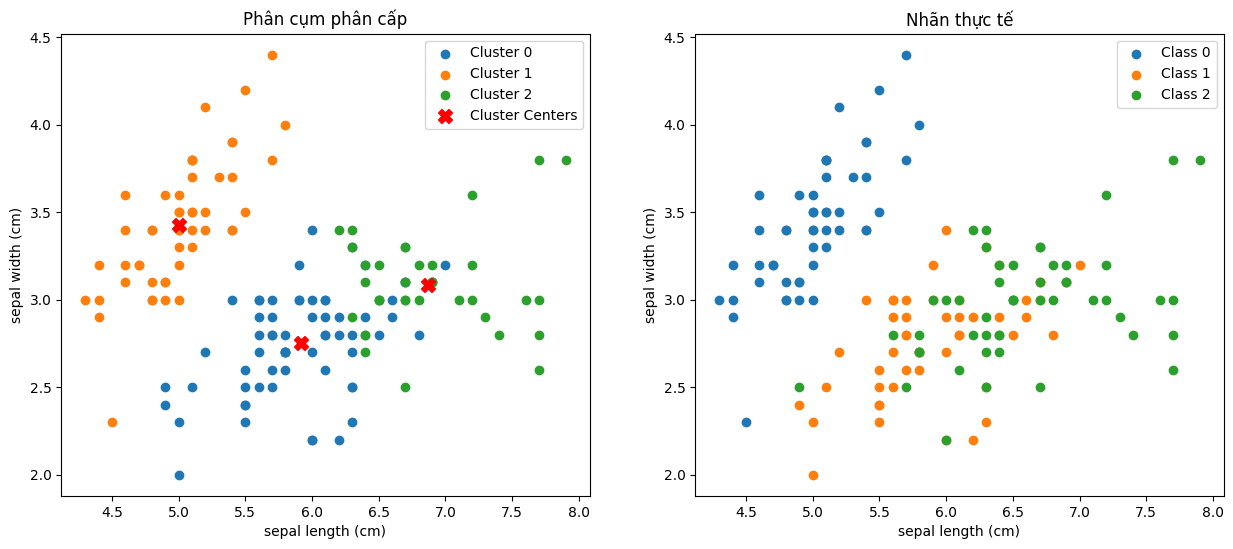

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Chạy thuật toán phân cụm phân cấp
agglomerative = AgglomerativeClustering(n_clusters=3)
labels_agglomerative = agglomerative.fit_predict(X)

# Tìm tâm của các cụm
cluster_centers = []
for label in np.unique(labels_agglomerative):
    cluster_centers.append(np.mean(X[labels_agglomerative == label], axis=0))

# Hiển thị kết quả của phân cụm phân cấp và nhãn thực tế
plt.figure(figsize=(15, 6))

# Vẽ biểu đồ cho kết quả phân cụm phân cấp
plt.subplot(1, 2, 1)
for label in np.unique(labels_agglomerative):
    plt.scatter(X[labels_agglomerative == label, 0], X[labels_agglomerative == label, 1], label=f'Cluster {label}')
plt.scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], marker='X', c='red', s=100, label='Cluster Centers')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Phân cụm phân cấp')
plt.legend()

# Vẽ biểu đồ cho nhãn thực tế
plt.subplot(1, 2, 2)
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Nhãn thực tế')
plt.legend()

plt.show()

# Tính toán độ đo chất lượng cụm cho cả 3 ví dụ trên

## Lý thuyết về các độ đo 

The term cluster validation is used to design the procedure of evaluating the goodness of clustering algorithm results. This is important to avoid finding patterns in a random data, as well as, in the situation where you want to compare two clustering algorithms.

Generally, clustering validation statistics can be categorized into 3 classes (Charrad et al. 2014,Brock et al. (2008), Theodoridis and Koutroumbas (2008)):

- Internal cluster validation, which uses the internal information of the clustering process to evaluate the goodness of a clustering structure without reference to external information. It can be also used for estimating the number of clusters and the appropriate clustering algorithm without any external data.
- External cluster validation, which consists in comparing the results of a cluster analysis to an externally known result, such as externally provided class labels. It measures the extent to which cluster labels match externally supplied class labels. Since we know the “true” cluster number in advance, this approach is mainly used for selecting the right clustering algorithm for a specific data set.
- Relative cluster validation, which evaluates the clustering structure by varying different parameter values for the same algorithm (e.g.,: varying the number of clusters k). It’s generally used for determining the optimal number of clusters.


- Đánh giá nội tại của phân cụm: Bao gồm việc đo lường chất lượng của việc phân cụm chỉ dựa trên thông tin nội tại của dữ liệu mà không cần thông tin bên ngoài. Phương pháp này giúp ước lượng số lượng cụm và chọn thuật toán phù hợp. Các độ đo thường được sử dụng bao gồm:
    Tính gần gũi hoặc độ đóng của cụm: Đánh giá mức độ gần gũi của các đối tượng trong cùng một cụm. Các chỉ số như phương sai trong cụm được sử dụng.
    Sự phân tách: Xác định mức độ phân biệt giữa các cụm, được đo bằng khoảng cách giữa trung tâm cụm hoặc khoảng cách tối thiểu giữa các đối tượng trong các cụm khác nhau.
    Kết nối: Đo lường mức độ các mục được đặt trong cùng một cụm với hàng xóm gần nhất của chúng, với mục tiêu là giảm thiểu giá trị này.
- Đánh giá ngoại tại của phân cụm: Liên quan đến việc so sánh kết quả phân cụm với nhãn được cung cấp từ bên ngoài, chẳng hạn như nhãn lớp đã biết trước. Phương pháp này giúp chọn thuật toán phân cụm phù hợp cho tập dữ liệu cụ thể, đặc biệt khi số lượng cụm thực sự đã biết trước.
- Đánh giá tương đối của phân cụm: Được sử dụng để đánh giá cấu trúc phân cụm bằng cách thay đổi các thông số của cùng một thuật toán, thường được sử dụng để xác định số lượng cụm tối ưu.

Để có nhiều thông tin hơn về các thang đo đánh giá kết quả phân cụm $\rightarrow$ tham khảo dưới đây:  

In [1]:
# %mv ~/Downloads/CH*Crit.pdf ThangDoPhanCum.pdf

In [3]:
# %pip install wand

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 1.6 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


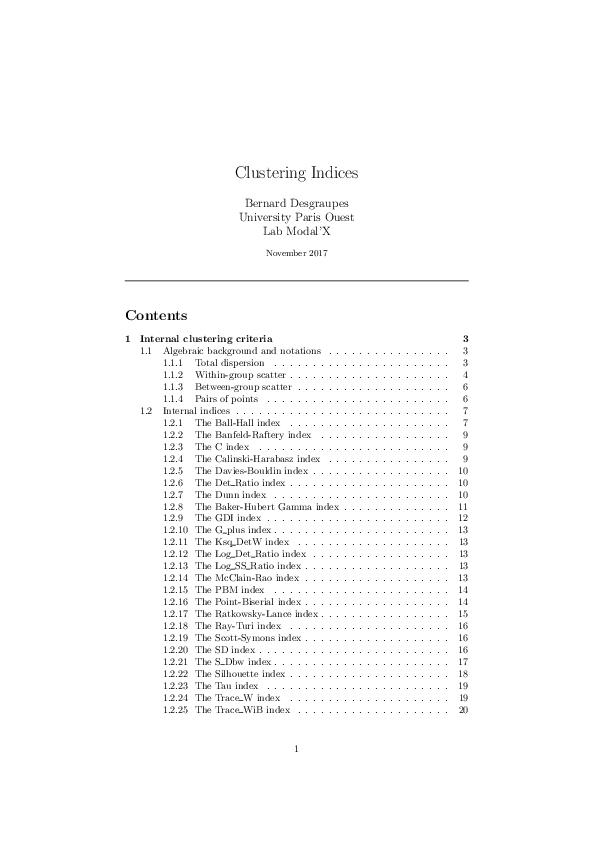

In [5]:
# from wand.image import Image as WImage
# img = WImage(filename='ThangDoPhanCum.pdf')
# img

## Code triển khai ví dụ

In [18]:
from sklearn.metrics import silhouette_score, completeness_score
import numpy as np

# Tính toán độ đo chất lượng cụm cho KMeans
inertia_kmeans = kmeans.inertia_
silhouette_kmeans = silhouette_score(X, labels_kmeans)
completeness_kmeans = completeness_score(y, labels_kmeans)

# Tính toán độ đo chất lượng cụm cho DBSCAN
silhouette_dbscan = silhouette_score(X, labels_dbscan)
completeness_dbscan = completeness_score(y, labels_dbscan)

# Tính toán độ đo chất lượng cụm cho phân cụm phân cấp
silhouette_agglomerative = silhouette_score(X, labels_agglomerative)
completeness_agglomerative = completeness_score(y, labels_agglomerative)

# In kết quả
print("Độ đo chất lượng cụm cho KMeans:")
print("Inertia:", inertia_kmeans)
print("Silhouette Score:", silhouette_kmeans)
print("Completeness Score:", completeness_kmeans)
print("-" * 40)

print("Độ đo chất lượng cụm cho DBSCAN:")
print("Silhouette Score:", silhouette_dbscan)
print("Completeness Score:", completeness_dbscan)
print("-" * 40)

print("Độ đo chất lượng cụm cho phân cụm phân cấp:")
print("Silhouette Score:", silhouette_agglomerative)
print("Completeness Score:", completeness_agglomerative)


Độ đo chất lượng cụm cho KMeans:
Inertia: 78.85144142614601
Silhouette Score: 0.5528190123564095
Completeness Score: 0.7649861514489816
----------------------------------------
Độ đo chất lượng cụm cho DBSCAN:
Silhouette Score: 0.48603419703456857
Completeness Score: 0.6565579648058795
----------------------------------------
Độ đo chất lượng cụm cho phân cụm phân cấp:
Silhouette Score: 0.5543236611296419
Completeness Score: 0.7795958005591144


In [7]:
!jupyter --paths

config:
    /home/harito/venv/py/etc/jupyter
    /home/harito/.jupyter
    /usr/local/etc/jupyter
    /etc/jupyter
data:
    /home/harito/venv/py/share/jupyter
    /home/harito/.local/share/jupyter
    /usr/local/share/jupyter
    /usr/share/jupyter
runtime:
    /home/harito/.local/share/jupyter/runtime
